Average Delay: 10.31 minutes

Average Delay by Weather:
 Weather
Fog      11.883721
Windy    10.675000
Clear     9.740000
Snow      9.700000
Rain      9.259259
Name: DelayMinutes, dtype: float64

Average Delay by Transport Type:
 TransportType
Bus      11.061224
Train     9.598039
Name: DelayMinutes, dtype: float64

Suggested Improvements:
- Improve infrastructure and safety measures during Fog conditions.
- Increase bus frequency or dedicated lanes to reduce delays.


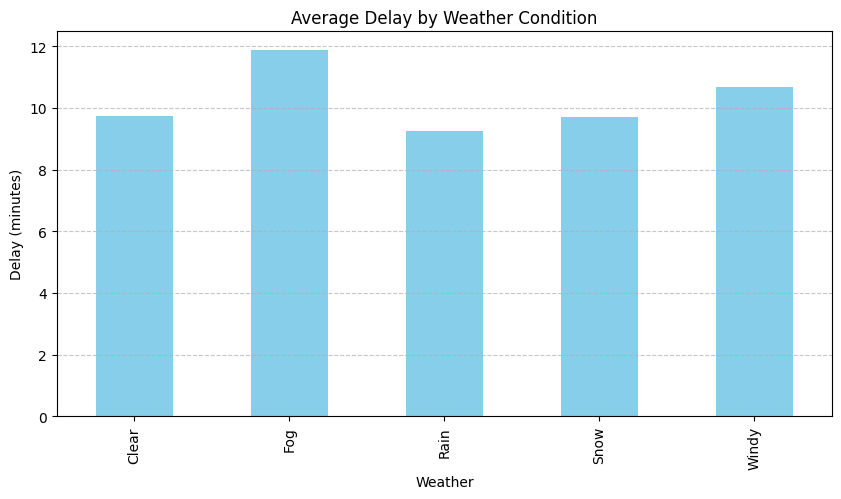

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


def simulate_data(num_records=100):

    transport_types = ["Bus", "Train"]
    weather_conditions = ["Clear", "Rain", "Fog", "Snow", "Windy"]

    data = []
    for _ in range(num_records):
        t_type = random.choice(transport_types)
        scheduled_time = datetime.now() + timedelta(minutes=random.randint(0, 120))
        delay_minutes = random.choice([0, 1, 2, 5, 10, 15, 20, 30])
        actual_time = scheduled_time + timedelta(minutes=delay_minutes)
        weather = random.choice(weather_conditions)

        data.append({
            "TransportType": t_type,
            "ScheduledTime": scheduled_time,
            "ActualTime": actual_time,
            "DelayMinutes": delay_minutes,
            "Weather": weather
        })

    return pd.DataFrame(data)


def analyze_delays(df):

    avg_delay = df["DelayMinutes"].mean()
    worst_weather = df.groupby("Weather")["DelayMinutes"].mean().sort_values(ascending=False)
    worst_transport = df.groupby("TransportType")["DelayMinutes"].mean().sort_values(ascending=False)

    return avg_delay, worst_weather, worst_transport


def suggest_improvements(worst_weather, worst_transport):

    suggestions = []

    # Weather-based suggestions
    if worst_weather.index[0] in ["Rain", "Snow", "Fog"]:
        suggestions.append(f"Improve infrastructure and safety measures during {worst_weather.index[0]} conditions.")

    # Transport-type based suggestions
    if worst_transport.index[0] == "Bus":
        suggestions.append("Increase bus frequency or dedicated lanes to reduce delays.")
    else:
        suggestions.append("Review train schedules and optimize platform changes.")

    return suggestions


def plot_delays(df):

    plt.figure(figsize=(10, 5))
    df.groupby("Weather")["DelayMinutes"].mean().plot(kind="bar", color="skyblue")
    plt.title("Average Delay by Weather Condition")
    plt.ylabel("Delay (minutes)")
    plt.xlabel("Weather")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def main():
    # Simulating data
    df = simulate_data(200)

    # Analyzing
    avg_delay, worst_weather, worst_transport = analyze_delays(df)

    # Suggestions
    suggestions = suggest_improvements(worst_weather, worst_transport)

    # Output results
    print(f"Average Delay: {avg_delay:.2f} minutes")
    print("\nAverage Delay by Weather:\n", worst_weather)
    print("\nAverage Delay by Transport Type:\n", worst_transport)
    print("\nSuggested Improvements:")
    for s in suggestions:
        print("-", s)

    # Plotting
    plot_delays(df)


if __name__ == "__main__":
    main()
